In [1]:
# -------- code outline ------- #
# This code starts with a function to remove the noise from the signal. Then there's a loop that 
# reads in each file, performs the noise removal, then saves the noise removed signal as a pickle file

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pickle
import pywt 
import scipy
from scipy import signal

In [66]:
#  I need to de-noise both lead of the ecg signal then put it back into one array


# -------- Noise Filtering -------- #
# This is the function that performs the noise removal of the signal
def DWT(signal, thresh = 0.003, wavelet="db4",num_leads = 2):
    # Make an empty array for the final de noised signal
    de_noised = np.zeros_like(signal)
    
    # Loop over the number of leads, filter each one then put into de_noised array
    for j in range(num_leads):
        # This performs the de-noising
        threshold = thresh*np.nanmax(signal[:,j])
        coeff = pywt.wavedec(signal[:,j], wavelet, mode="smooth")
        coeff[14:] = (pywt.threshold(i, value=threshold, mode="soft" ) for i in coeff[14:])
        reconstructed_signal = pywt.waverec(coeff, wavelet, mode="smooth" )
        
        de_noised[:,j] = reconstructed_signal
    
    
    return de_noised

In [67]:
# Need to loop over every patient and put the de-noised data into the de-noised folder
# Easiest by looping over the list of names 

names = [100,101,102,103,104,105,106,107,108,109,111,112,113,114,115,116,117,118,119,121,122,123,
        124,200,201,202,203,205,207,208,209,210,212,213,214,215,217,219,220,221,222,223,228,230,
        231,232,233,234]

for i,name in enumerate(names):
    with open('/Users/Teddy/AnacondaProjects/MPhys_Project/PreProcessing/Data Extraction/Raw Data/adb arrays/{}_array.pkl'.format(name),'rb') as f:
        data = pickle.load(f)
        
    denoised = DWT(data,thresh=0.2,wavelet="db4",num_leads=2)
    
    with open('/Users/Teddy/AnacondaProjects/MPhys_Project/PreProcessing/De-Noised Data/adb de-noised/{}_de-noised.pkl'.format(i), 'wb') as f:
        pickle.dump(denoised, f)
    

In [62]:
with open('/Users/Teddy/AnacondaProjects/MPhys_Project/PreProcessing/Data Extraction/Raw Data/adb arrays/201_array.pkl','rb') as f:
    test = pickle.load(f)

In [63]:
new_data = DWT(test, thresh = 0.2, wavelet="db4",num_leads = 2)

In [65]:
%matplotlib qt
plt.plot(new_data[:1000,0])
plt.plot(test[0:1000,0])
#plt.plot(test[:200,0])

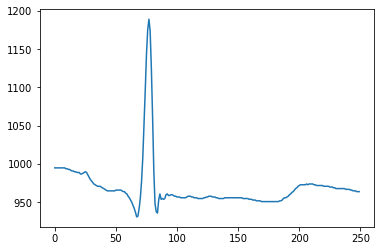

In [4]:

plt.plot(test[:250,0])

In [67]:
def DWT2(signal, thresh = 0.003, wavelet="db4",num_leads = 2):
    # Make an empty array for the final de noised signal
    de_noised = np.zeros_like(signal)
    
    # Loop over the number of leads, filter each one then put into de_noised array
    for j in range(num_leads):
        # This performs the de-noising
        coeff = pywt.wavedec(signal[:,j], wavelet, mode="smooth")
        threshold = 0
        
        coeff[15:] = (pywt.threshold(i, value=threshold, mode="less" ) for i in coeff[15:])
        reconstructed_signal = pywt.waverec(coeff, wavelet, mode="smooth" )
        
        de_noised[:,j] = reconstructed_signal
    
    
    return de_noised

In [68]:
new = DWT2(test)

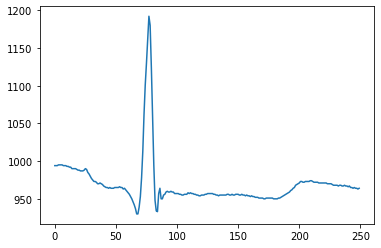

In [69]:

plt.plot(new[:250,0])